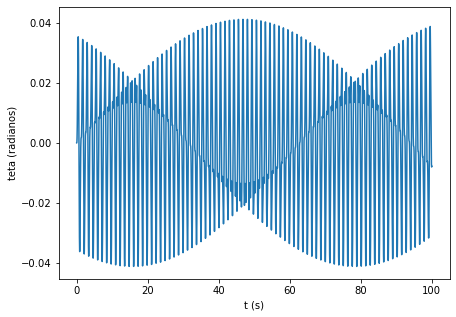

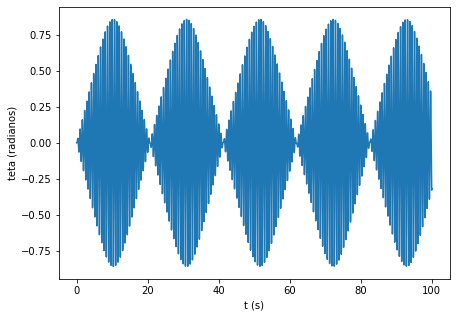

In [1]:
import numpy as np
import matplotlib.pyplot as plt

l = 0.1 #m
g = 9.8 #m/s
teta0 = 0 #graus em relação com a vertical
omega0 = 0 #largado do repouso

t0 = 0
tf = 100
N = 7000
h = (tf - t0) / N
tPontos = np.arange(t0,tf,h)

def valoresTeta(C,Omega_const):
    def f(r,t):
        teta = r[0]
        omega = r[1]
        fTeta = omega
        fOmega = - g/l * np.sin(teta) + C*np.cos(teta) * np.sin(Omega_const*t)
        return np.array([fTeta , fOmega ], float)
    
    tetaPontos = []
    omegaPontos = []
    r = np.array([teta0,omega0],float)
    for t in tPontos:
        tetaPontos.append(r[0])
        #omegaPontos.append(r[1])
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5*k1, t+0.5*h)
        k3 = h * f(r + 0.5*k2, t+0.5*h)
        k4 = h * f(r + k3, t+h)
        r += (k1 + 2*k2 + 2*k3 + k4) /6 
    
    return tetaPontos

plt.figure(figsize = (7,5))
plt.plot(tPontos,valoresTeta(2,5))
plt.xlabel("t (s)")
plt.ylabel("teta (radianos)")
plt.show()

plt.figure(figsize = (7,5))
plt.plot(tPontos,valoresTeta(2,np.sqrt(g/l)))
plt.xlabel("t (s)")
plt.ylabel("teta (radianos)")
plt.show()